In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale

from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
from scipy import signal
import scipy.cluster.hierarchy as spc
from pandas import read_excel
from ipywidgets import widgets
from ipywidgets import interactive, HBox, VBox
import plotly.io as pio
import seaborn as sns
import numpy as np
import os
import plotly.express as px
from sklearn.cluster import KMeans
from plotly.graph_objs import *
from plotly.subplots import make_subplots

In [7]:
path = 'data_aslam/'

In [4]:
def change_config(fig):
    '''This function helps us to format graphs in order to fit with
    html pages'''
    # params 
    # title and labels
    size_title = 15 
    size_axes_labels = 14
    family = 'Courier' # font 
    color = '#F2F2F2'
    #color = '#444'
    
    
    # plot config
    width = 1300
    height = 600
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#F2F2F2'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'red'
    grid_color_y = 'rgba(0,0,0,0)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        #height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels,
        #gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        ticks = ticks,
        tickwidth = tickwidth, 
        tickcolor = tickcolor,
        ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
        #gridwidth=None
    )
    
    return fig
 
    

# INTRODUCTION 

## Meat consumption graph from 2004 to 2013 (EU 28 Countries mean)

In [2]:
df = pd.read_csv('meat_consumption_per_habita_2004_2013.csv')
mean_per_year = df.groupby(['years'])['consumption per habita'].mean()

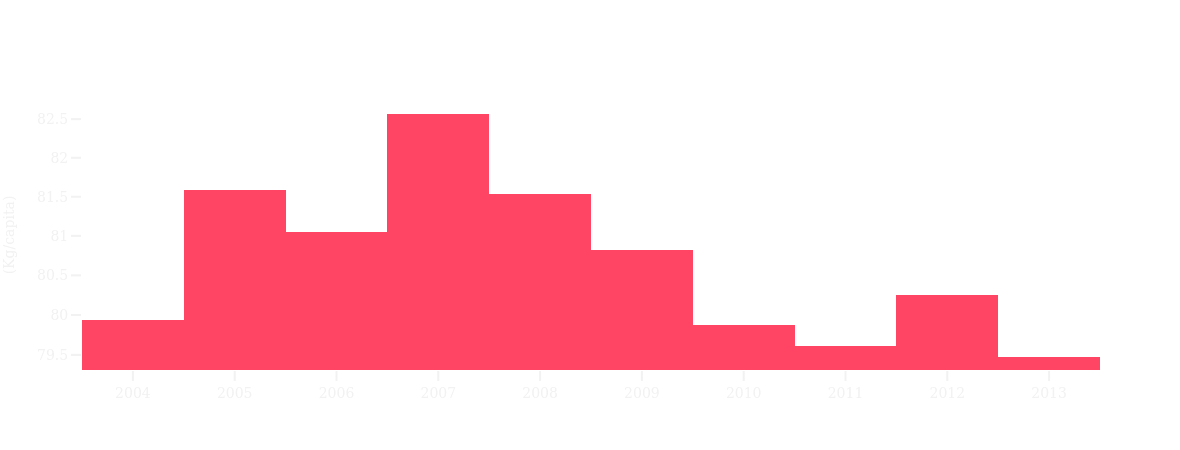

In [6]:
from plotly.subplots import make_subplots
trace0 = go.Histogram(
    x=mean_per_year.index,
    y=mean_per_year.values,
    histfunc='avg',
    nbinsx = 100,
    marker=dict(
        color='#FF4464',
    ),
    #color_discrete_sequence=['indianred']
  )




fig = make_subplots(rows=1, cols=1)
fig.update_layout(yaxis_type="log")
#fig.update_xaxes(title_text='Years')
fig.update_yaxes(title_text='(Kg/capita)')
#fig.update_layout(title_text ='Meat consumption of the 28 EU countries over the years')
fig.append_trace(trace0, 1, 1)
change_config(fig).show()
#pio.write_html(change_config(fig), file='conso_moyenne_jusqua_2014.html', auto_open=True)

## Meat consumption per EU country

In [8]:
meat_consumption_path = path + 'fao_meat_consumption_pretty_clean.csv'
meat_consumption = pd.read_csv(meat_consumption_path, low_memory=False, delimiter=';')
meat_consumption = meat_consumption.drop(columns=['Domain'])

In [9]:
europe = [
    "Austria", 
    "Belgium", 
    "Bulgaria", 
    "Croatia", 
    "Republic of Cyprus", "Cyprus",
    "Czech Republic", "Czechia",
    "Denmark", 
    "Estonia", 
    "Finland", 
    "France", 
    "Germany", 
    "Greece", 
    "Hungary", 
    "Ireland", 
    "Italy", 
    "Latvia", 
    "Lithuania", 
    "Luxembourg", 
    "Malta", 
    "Netherlands", 
    "Poland", 
    "Portugal", 
    "Romania", 
    "Slovakia", 
    "Slovenia", 
    "Spain", 
    "Sweden", 
    "United Kingdom"
]

In [10]:
# filter to take only the countries from EU
meat_consumption = meat_consumption[meat_consumption.Country.isin(europe)]

In [11]:
# obtain the consumption by summing ['Bovine Meat', 'Mutton & Goat Meat', 'Pigmeat', 'Poultry Meat']
meat_consumption = meat_consumption.groupby(['Country','Year']).sum().unstack(level=1)

In [13]:
meat_consumption['Country'] = meat_consumption.index
meat_consumption = pd.melt(meat_consumption, id_vars=['Country'])

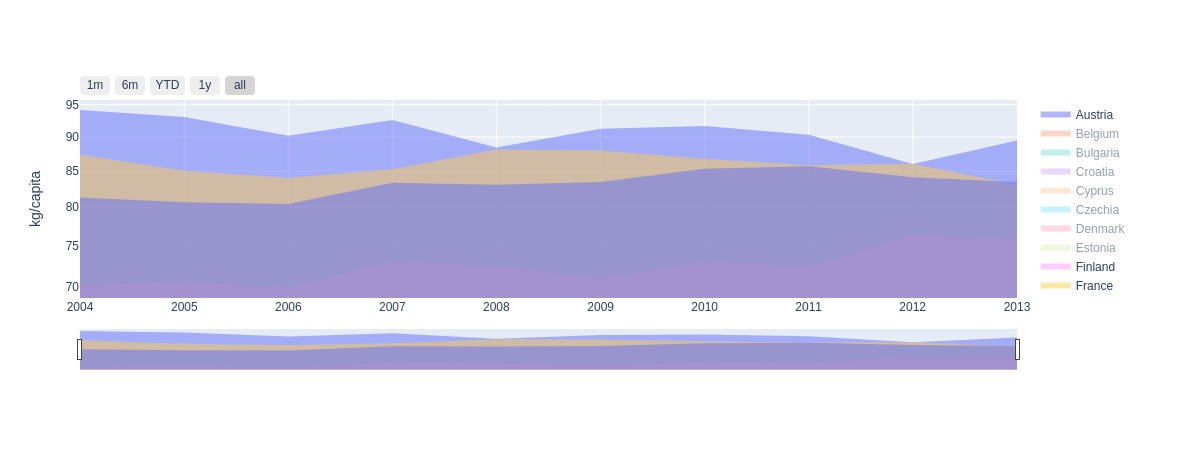

In [17]:
fig = go.Figure()

country_to_disp = ['Austria', 'Finland','Germany', 'France']

for country in meat_consumption.Country.unique():
    if(country in country_to_disp):
        fig.add_trace(go.Scatter(
            x=meat_consumption[meat_consumption.Country == country]['Year'],
            y=meat_consumption[meat_consumption.Country == country]['value'],
            #visible = "legendonly",
            #fill='tonexty',
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=country,
            #histfunc='avg',
            #nbinsx = 100,
            #marker=dict(
            #    color=random.randint(10,99999)#'#FF44'+str(random.randint(10,99)),
            #),
            #color_discrete_sequence=['indianred']
          ))
        
    else:
        fig.add_trace(go.Scatter(
            x=meat_consumption[meat_consumption.Country == country]['Year'],
            y=meat_consumption[meat_consumption.Country == country]['value'],
            visible = "legendonly",
            #fill='tonexty',
            fill='tozeroy',
            mode='none',
            #color='Area',
            name=country,
            #histfunc='avg',
            #nbinsx = 100,
            #marker=dict(
            #    color=random.randint(10,99999)#'#FF44'+str(random.randint(10,99)),
            #),
            #color_discrete_sequence=['indianred']
          ))
    
    


# Overlay both histograms
#fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.1)
fig.update_layout(yaxis_type="log")

# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ), 
    yaxis_title="kg/capita",
)

#change_config(fig).show()
fig.show()

#pio.write_html(change_config(fig), file='graphe2.html', auto_open=True)

# PART 3

## Climate Change Google trend

In [1]:
fr_cons = pd.read_csv('data_aslam/fr_consumption.csv')

NameError: name 'pd' is not defined

In [18]:
df_ecology = pd.read_pickle("./data_martin/GoogleTrend0.pkl")
df_green_peace = pd.read_pickle("./data_martin/GoogleTrend1.pkl")
df_sea_shepherd = pd.read_pickle("./data_martin/GoogleTrend2.pkl")
df_climate_change = pd.read_pickle("./data_martin/GoogleTrend3.pkl")
df_giec = pd.read_pickle("./data_martin/GoogleTrend4.pkl")
df_global_warming = pd.read_pickle("./data_martin/GoogleTrend5.pkl")

In [19]:
data = [["2006-05-24", "An Inconvenient Truth Movie"],
        ['2006-11-06', "COP12"], 
        ['2007-12-03', "COP13"], 
        ['2007-09-18', "IPCC 4th Assessment Report"],
        ['2008-12-01', "COP14"], 
        ['2009-12-07', "COP15"],
        ["2009-12-18", "Copenhagen Accord"],
        ['2010-11-28', "COP16"],
        ['2011-11-27', "COP17"],
        ['2012-11-26', "COP18"],
        ['2013-11-11', "COP19"],
        ['2014-12-01', "COP20"],
        ['2015-11-30', "COP21"],
        ["2015-12-12", "Paris Agreement"],
        ['2016-11-07', "COP22"],
        ['2017-11-06', "COP23"],
        ["2018-09-08", "Rise for climate"],
        ['2018-12-03', "COP24"],
        ['2019-06-17', "COP25"],
        ["2019-03-19", "Start of School strike for the climate"]] 

In [20]:
df_global_change = df_global_warming + df_climate_change

df_global_change_norm = df_global_change.copy()

for x in range(0,28):
        df_global_change_norm.iloc[:,x] = df_global_change_norm.iloc[:,x]/df_global_change_norm.iloc[:,x].max()
        
df_global_change_norm.loc[:,"Total norm"] = df_global_change_norm.sum(axis=1)




In [23]:
def change_config_graphe_1(fig):
    '''Custom parametrization for plot'''
    # params 
    # title and labels
    size_title = 15 
    size_axes_labels = 15
    family = 'Courier' # font 
    color = '#F2F2F2'
    #color = '#2b2b2b'
    
    
    # plot config
    width = 1300
    height = 600
    
    # configuration of the axes (ticks for each label on the axes)
    ticks = 'outside'
    tickwidth = 2 
    tickcolor = '#2b2b2b'
    ticklen = 10
    
    # grid color 
    grid_color_x = 'white'
    grid_color_y = 'rgba(0,0,0,0)'
    
    
    # font for title and labels 
    font_title = dict(size=size_title, family=family, color=color)
    font_axes_labels =  dict(size=size_axes_labels, family=family, color=color)
    
    
    # remove background and configure size
    layout = Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        font = font_axes_labels,
        titlefont = font_title,
        #height=height,
        #width=width,
    )
    
    fig.update_layout(layout)
    
    # update the axes configuration
    fig.update_xaxes(
      #  ticks = ticks,
       # tickwidth = tickwidth, 
       # tickcolor = tickcolor,
       # ticklen = ticklen,
        title_font = font_axes_labels,
        gridcolor = grid_color_x
    )
    
    fig.update_yaxes(
        #ticks = ticks,
        #tickwidth = tickwidth, 
        #tickcolor = tickcolor,
       # ticklen = ticklen,
        title_font = font_axes_labels, 
        gridcolor = grid_color_y,
        #gridwidth=None
    )
    
    return fig

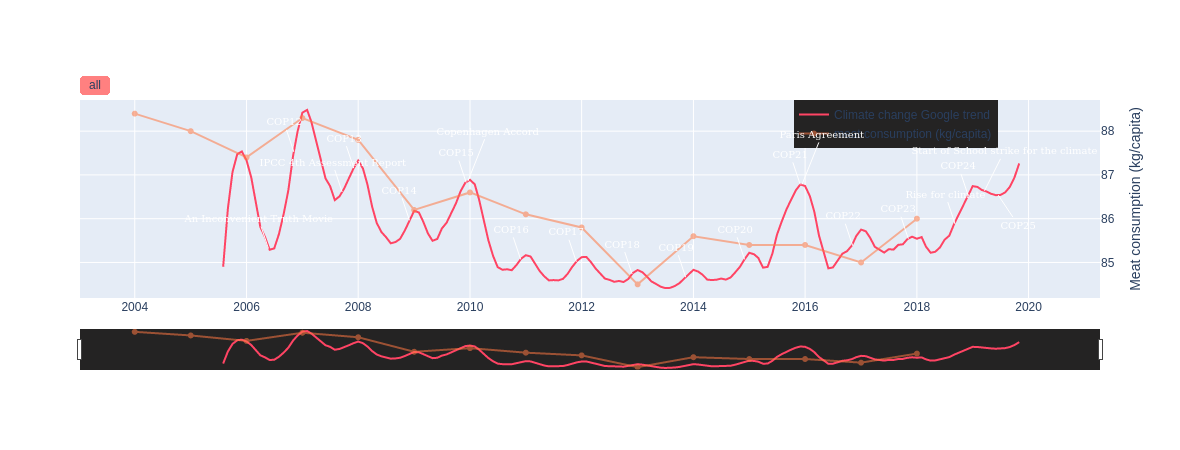

In [27]:

fig = make_subplots(specs=[[{"secondary_y": True}]])
#fig = go.Figure()
df = df_global_change_norm.loc[:,"FR"]
#fig.add_trace(go.Scatter(x=df.index, y=df, mode='lines',name=x))
fig.add_trace(go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), mode='lines', marker_color='#FF4464',
                        name='Climate change Google trend'),
             secondary_y=False,)

fig.add_trace(go.Scatter(
    x = fr_cons['Date'],
    y = fr_cons['Total(kg)/hab'], 
    marker_color= '#FF7944',  opacity=0.55,
name ='meat consumption (kg/capita)'),
    secondary_y = True, 
              

)

fig.update_yaxes(title_text="Meat consumption (kg/capita)", secondary_y=True)

hauteurAnnotation = [-45,-15,-15,-30,-15,-30,-45,-30,-15,-30,-45,-30,-15,-30,-45,-15,-30,-15,-15,-45,-15]

position = [0.8 for x in range(20)]
position[0] = 0.32
position[1] = 0.6415
position[2] = 0.5875
position[3] = 0.508
position[4] = 0.4141
position[5] = 0.5387+0.001
position[6] = 0.544
position[7] = 0.284
position[8] = 0.276
position[9] = 0.235

position[10] = 0.2245
position[11] = 0.2840
position[12] = 0.5134+0.02
position[13] = 0.5333
position[14] = 0.3293
position[15] = 0.3525
position[16] = 0.4013
position[17] = 0.4952
position[18] = 0.4975
position[19] = 0.512


arrowColor = 'white'
family = 'Courier' # font 
color = 'white'
annotationFont= dict(size=10, family=family, color=color)

for index in range(len(data)):
    if(index == 6 or index == 13):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=-50,
            ),) 
        
    elif(index == 18):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=30,
            ),) 
    elif(index == 19):
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                arrowcolor=arrowColor,
                font = annotationFont,
                    ax=20,
                    ay=-40,
            ),) 
        
    else:
        event = data[index]
        fig.add_annotation(
            go.layout.Annotation(
                    x=event[0],
                    y=position[index],
                    text=event[1],
                    showarrow=True,
                    arrowcolor=arrowColor,
                font = annotationFont,

            ), )
        
        
layout = go.Layout(
    yaxis=dict(
        autorange=True,
        showgrid=False,
        ticks='',
        showticklabels=False
    ), 

)


# legend onn graph
fig.update_layout(
    legend=go.layout.Legend(
        x=0.7,
        y=1,
        bgcolor="#242323"
        
    )
)

# remove y axis label    
fig.update_layout(layout)

#fig.update_layout(
#    showlegend=False,
#    annotations=updatePlotWithAnnotations(hauteurAnnotation,"2004-01-01","2019-11-01")
#    )



#pio.write_html(change_config(fig), file='climate_change_google_search.html', auto_open=True)


# Add range slider
fig.update_layout(
    xaxis=go.layout.XAxis(
        rangeselector=dict(
            buttons=list([
                #dict(count=1,
                #     label="1m",
                #     step="month",
                #     stepmode="backward"),
                #dict(count=6,
                #     label="6m",
                #     step="month",
                #     stepmode="backward"),
                #dict(count=1,
                #     label="YTD",
                #     step="year",
                #     stepmode="todate"),
                #dict(count=1,
                #     label="1y",
                #     step="year",
                #     stepmode="backward"),
                dict(step="all",)
            ]),  bgcolor='red'
        ),
        rangeslider=dict(
            visible=True, bgcolor='#242323',#bordercolor='blue'
        ),
        type="date"
    )
)

fig.show()
#change_config(fig).show()

# GOOOOOOOOOOOOOGLLLLLLLLEEEEEEE GOOGLE TREND
#  FOR DATA STORY

#pio.write_html(change_config_graphe_1(fig), file='climate_change_google_search.html', auto_open=True)

## Google trend vs meat consumption per category

In [30]:
meat_consumption_path = path + 'DP_LIVE_23112019095726322.csv'
meat_consumption = pd.read_csv(meat_consumption_path)

meat_consumption = meat_consumption.drop(columns = ['INDICATOR', 'Flag Codes', 'FREQUENCY'])

meat_consumption = meat_consumption[meat_consumption['MEASURE'] == 'KG_CAP']
meat_consumption = meat_consumption[ (meat_consumption['TIME'] >= 2004) & (meat_consumption['TIME'] <= 2018)]
meat_consumption = meat_consumption[ (meat_consumption['LOCATION'] == 'EU27') | (meat_consumption['LOCATION'] == 'GBR')]
population_EU28_2004_2019 = [492555798, 494598322, 496436597, 498300775, 500297033, 502090235, 503170618, 502964837, 504047749, 505163053, 507235091, 508520205, 510181874, 511373278, 512379225]
population_UK_2004_2019 = [59793759, 60182050, 60620361, 61073279, 61571647, 62042343, 62510197, 63022532, 63495088, 63905342, 64351203, 64853393, 65379044, 65844142, 66273576]
UK_2004_2019_ratio = [x/y for x,y in zip(population_UK_2004_2019, population_EU28_2004_2019)]
population_EU27_2004_2019_ratio = [(x-y)/x for x,y in zip(population_EU28_2004_2019,population_UK_2004_2019)]
def ratio(row):
    """This function returns the correct ratio for a row depending on LOCATION and year"""
    if row['LOCATION'] == 'EU27':
        val = population_EU27_2004_2019_ratio[row['TIME'] - 2004]
    elif row['LOCATION'] == 'GBR':
        val = UK_2004_2019_ratio[row['TIME'] - 2004]
    return val


meat_consumption['ratio'] =  meat_consumption.apply(ratio, axis=1)
meat_consumption['Value'] = meat_consumption['ratio'] * meat_consumption['Value']

meat_consumption = meat_consumption.groupby(['TIME', 'SUBJECT'])['Value'].sum().unstack(level=1)

meat_consumption['all_consumption'] = ( 
                                    (0.7 * meat_consumption['BEEF']) +
                                    (0.78 * meat_consumption['PIG']) +
                                    (0.88 * (meat_consumption['SHEEP'] + meat_consumption['POULTRY'])))

meat_consumption['all_consumption_2'] = ( 
                                    (meat_consumption['BEEF']) +
                                    (meat_consumption['PIG']) +
                                    ((meat_consumption['SHEEP'] + meat_consumption['POULTRY'])))

meat_consumption['years'] = meat_consumption.index

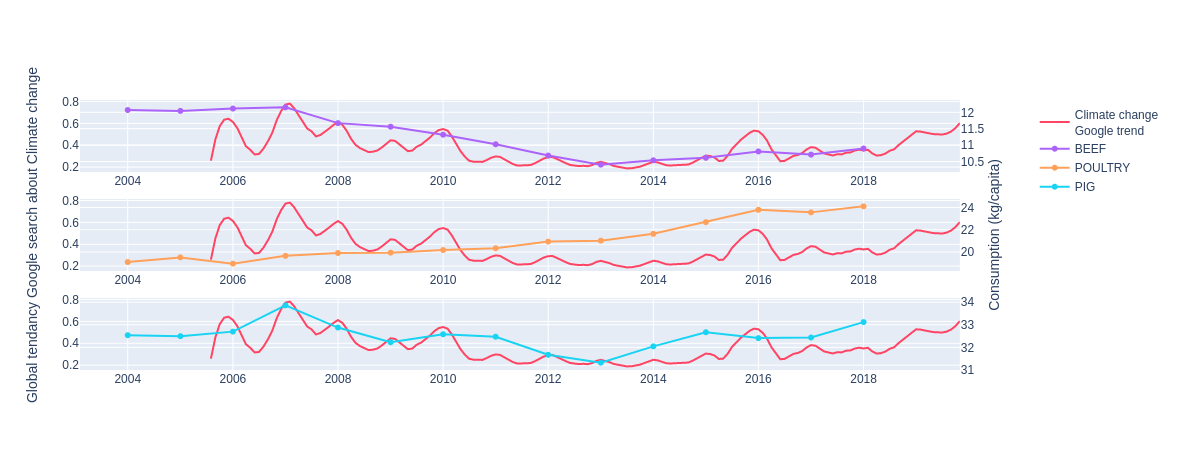

In [32]:

arrowColor = 'white'
family = 'Courier' # font 
color = 'white'
annotationFont= dict(size=10, family=family, color=color)


label_name = 'Climate change <br>Google trend'


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}] ], rows=3, cols=1)

fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name, marker_color='#FF4464', showlegend=False,  ), secondary_y=False, 
              row=1, col=1  ,        )


fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name,  marker_color='#FF4464', showlegend=False ), secondary_y=False, 
              row=2, col=1   ,      )

fig.add_trace(
    go.Scatter(x=df.index, y=signal.savgol_filter(df,15, 3), name=label_name,  marker_color='#FF4464'), secondary_y=False, 
              row=3, col=1  ,        )


fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.BEEF,name="BEEF"),
    secondary_y=True,
     row=1, col=1 
)
#fig.update_yaxes(title_text="Beef consumption (kg/capita)", row=1, col=1, secondary_y=True)

fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.POULTRY,name="POULTRY"),
    secondary_y=True,
     row=2, col=1, 
)

#fig.update_yaxes(title_text="Poultry consumption (kg/capita)",  row=2, col=1, secondary_y=True)

fig.add_trace(
    go.Scatter(x=meat_consumption.years,
    y=meat_consumption.PIG,name="PIG"),
    secondary_y=True,
     row=3, col=1 
)

# Set y-axes titles
fig.update_yaxes(title_text="Global tendancy Google search about Climate change", secondary_y=False, row=2, col=1)
fig.update_yaxes(title_text="Consumption (kg/capita)", secondary_y=True, row=2, col=1)

fig.show()

#pio.write_html(change_config_graphe_1(fig), file='GoogleTrendComparison.html', auto_open=True)

## Media coverage vs consumption

In [34]:
my_sheet = 'Sheet2'
file_name = "./data_martin/coverage_media.xlsx"
coverageMedia = read_excel(file_name, sheet_name = my_sheet)
coverageMedia = coverageMedia[coverageMedia['Country'] == 'FRA']
coverageMedia = coverageMedia.T
def plot_lines2(df,value_smooth):
    fig = go.Figure()
    for x in range(0,2):
        if value_smooth == 0:
            fig.add_trace(go.Scatter(x=df.index, y=coverageMedia.iloc[2:,x], mode='lines',name=coverageMedia.iloc[1,:][5+x]))
        else:
            fig.add_trace(go.Scatter(x=df.index, y=signal.savgol_filter(coverageMedia.iloc[2:,x],value_smooth, 3), mode='lines',name=coverageMedia.iloc[1,:][5+x]))
    change_config(fig).show()
    #pio.write_html(change_config(fig), file='press.html', auto_open=True)
    #fig.show()




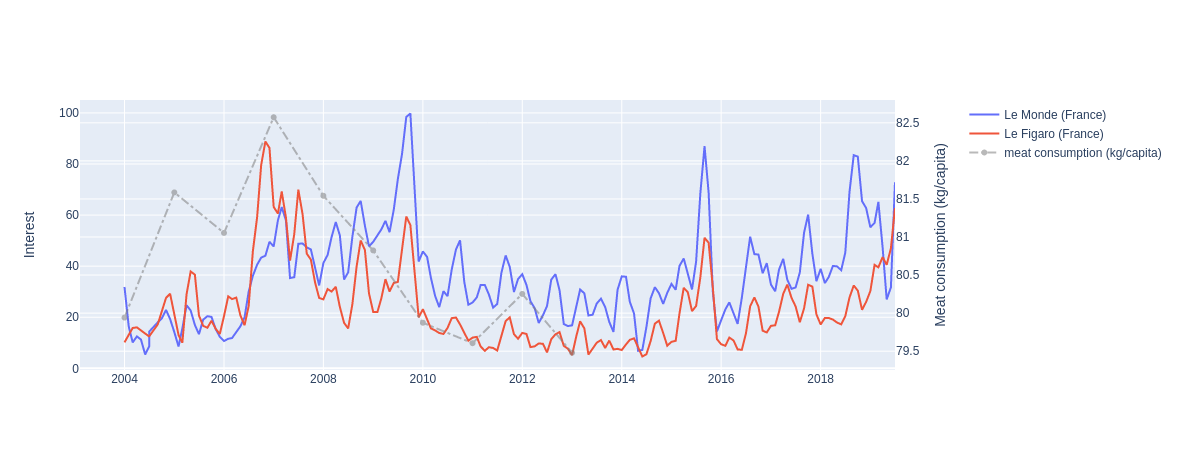

In [42]:

value_smooth = 5
    
#px.line(meat_consumption, x='years', y='all_consumption',)


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


for x in range(0,2):
    if value_smooth == 0:
        fig.add_trace(go.Scatter(x=coverageMedia.index, y=coverageMedia.iloc[2:,x], mode='lines',name=coverageMedia.iloc[1,:][5+x]), secondary_y=False, )
    else:
        fig.add_trace(go.Scatter(x=coverageMedia.index, y=signal.savgol_filter(coverageMedia.iloc[2:,x],value_smooth, 3), mode='lines',name=coverageMedia.iloc[1,:][5+x]), secondary_y=False, )
        

# jusqu'à 2018
#fig.add_trace(
#    go.Scatter(x=meat_consumption.years,
#    y=meat_consumption.all_consumption,name="meat consumption (mean)"),
#    secondary_y=True,
#)

# jusqu'à 2013
fig.add_trace(
    go.Scatter(x=mean_per_year.index,
    y=mean_per_year.values,name="meat consumption (kg/capita)", opacity= 0.55,
              line=dict(color='grey', width=2,
                              dash='dashdot')),
    secondary_y=True,
    
)

# Add figure title
#fig.update_layout(
#    title_text="Media Coverage vs meat consumption par rapport  a yearsssssss"
#)

# Set x-axis title
#fig.update_xaxes(title_text="YEARS")

# Set y-axes titles
fig.update_yaxes(title_text="Interest", secondary_y=False)
fig.update_yaxes(title_text="Meat consumption (kg/capita)", secondary_y=True)

fig.show()